## Problem in  KMeans

While KMeans is a good algorithm, the time complexity is very poor. Kmeans works in $O(n \cdot K \cdot I \cdot f)$ Where 
n is number of records, K is number of clusters, I is number of iterations, f is number of features in particular record. Clearly, the algorithm will take forever to complete on a dataset of > 100,000 data points.

## Minibatch KMeans

Main features of Minibatch KMeans are:
1. Instead of using the entire dataset at once, it operates in batches.
2. Uses Gradient Descent update, which is way more faster than what KMeans does. 

How it works is, it takes batches of datasets and finds the centroids for the smaller dataset (minibatch) Then for the next batch, it uses the centroid found in previous batch and updates it using Gradient Descent. This simple method makes it faster by a magnitude of the input size. 


## Gotchas of using Minibatch KMeans
1. While the performance is good, the result might or might not be good -- it totally depends on the __initial conditions__.
2. The result might be somewhat different than what is obtained from KMeans. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
X = df.iloc[:, [3, 4]].values
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
from sklearn.cluster import MiniBatchKMeans

clf = MiniBatchKMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_minikmeans = clf.fit_predict(X)

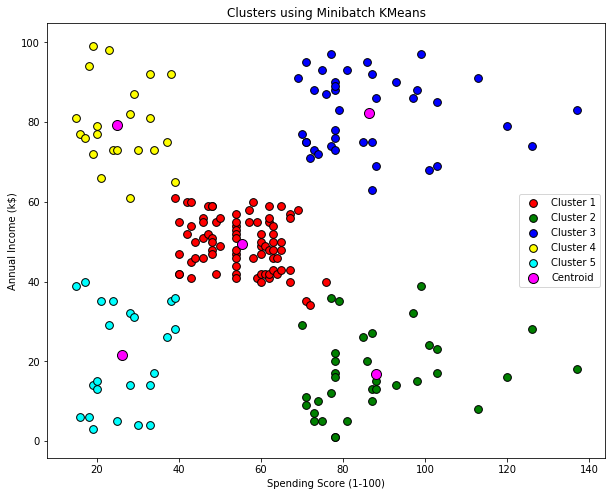

In [10]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[y_minikmeans == 0, 0], X[y_minikmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_minikmeans == 1, 0], X[y_minikmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_minikmeans == 2, 0], X[y_minikmeans == 2, 1], color='blue',s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X[y_minikmeans == 3, 0], X[y_minikmeans == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(X[y_minikmeans == 4, 0], X[y_minikmeans == 4, 1], color='cyan', s=60, label='Cluster 5', edgecolors='black')
# cluster centres
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Clusters using Minibatch KMeans')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.show()

As we can see the output is nearly the same as what's seen in last post on KMeans